# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("balanced_spam_data.csv", encoding = "ISO-8859-1")

In [3]:
data.tail(n=10)

Unnamed: 0                                                sms labels
2978        2304              Don I ' t think he has spatula hands!    ham
2979        1002  Todays numbers Voda ending 7548 selected are t...   spam
2980         563  SMS AUCTION You have won a Nokia 7250i. This i...   spam
2981         962  Valentines Day Special! Win over Ã¥ 1000 Â£ in...   spam
2982        2070  No i ' m not gonna be able to. | | too late no...    ham
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

In [4]:
data.shape

(2988, 3)

# Data Cleaning

In [5]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [6]:
data

Unnamed: 0                                                sms labels
0           1737  Good afternoon starshine! How's my boytoy? Doe...    ham
1           2339  My sis is catching e show in e afternoon so i'...    ham
2           1905                             What happened to date?    ham
3           1898                           K:)k.are you in college?    ham
4           2759                        S but mostly not like that.    ham
...          ...                                                ...    ...
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

[2988 rows x 3 columns]

In [7]:
columns_to_drop = ['Unnamed: 0']
data.drop(columns_to_drop,inplace=True, axis=1)

In [8]:
data

sms labels
0     Good afternoon starshine! How's my boytoy? Doe...    ham
1     My sis is catching e show in e afternoon so i'...    ham
2                                What happened to date?    ham
3                              K:)k.are you in college?    ham
4                           S but mostly not like that.    ham
...                                                 ...    ...
2983  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986  Urgent UR awarded a complimentary trip to Euro...   spam
2987                               Where r we converge?    ham

[2988 rows x 2 columns]

In [9]:
def clean_text(text):
    """
    To clean a textual data
    params: text : str
    return final_text : str
    """
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [porter.stem(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

In [10]:
data['sms'] = data['sms'].apply(clean_text)

In [11]:
data.shape

(2988, 2)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data['sms'], data['labels'], test_size = 0.2, random_state = 2)

In [14]:
y_train.shape

(2390,)

In [15]:
X_test.shape

(598,)

In [16]:
x_test_list = X_test.tolist()
y_test_list = y_test.tolist()

In [17]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

# converting text to numerical representation


In [18]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['sms'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

## Building voting based classifier (Hard Voting) 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

naive_bayes_classifier = MultinomialNB(alpha=0.2)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC()

hard_voting_based_classifier = VotingClassifier(
    estimators=[('svm', svm_classifier), ('knn', knn_classifier), ('naive', naive_bayes_classifier)],
    voting='hard')

for clf, label in zip([svm_classifier, knn_classifier, naive_bayes_classifier, hard_voting_based_classifier], ['Support Vector Machines', 'K Neaser Neighbor', 'Multinomial Naive Bayes', 'Hard Voting Based Ensemble Classifier']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("5 fold cross validation done for --> ",label)
    print("The cross validation score is \n",scores)
    print("Average score for {} is {}".format(label,scores.mean()))
    print("\n")

## Building voting based classifier (Soft Voting)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

naive_bayes_classifier = MultinomialNB(alpha=0.2)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC(probability=True)


hard_voting_based_classifier = VotingClassifier(
    estimators=[('svm', svm_classifier), ('knn', knn_classifier), ('naive', naive_bayes_classifier)],
    voting='soft', weights=[3, 1, 5])

for clf, label in zip([svm_classifier, knn_classifier, naive_bayes_classifier, hard_voting_based_classifier], ['Support Vector Machines', 'K Neaser Neighbor', 'Multinomial Naive Bayes', 'Hard Voting Based Ensemble Classifier']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
#     print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
#     import pdb;pdb.set_trace()
    print("5 fold cross validation done for --> ",label)
    print("The cross validation score for every fold \n",scores)
    print("Average score for {} is {}".format(label,scores.mean()))
    print("\n")

## Building voting based classifier (Hard Voting) with rvm

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from skrvm import RVC

In [20]:
X_train = X_train.toarray()

naive_bayes_classifier = MultinomialNB(alpha=0.2)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svm_classifier = SVC()
rvm_classifier = RVC(kernel='linear')

rvm_classifier.fit(X_train,y_train)

rvm_classifier._estimator_type = 'classifier'

hard_voting_based_classifier = VotingClassifier(
    estimators=[('svm', svm_classifier), ('knn', knn_classifier), ('naive', naive_bayes_classifier),('rvm', rvm_classifier)],
    voting='hard')

hard_voting_based_classifier.fit(X_train,y_train)

for clf, label in zip([svm_classifier, knn_classifier, naive_bayes_classifier, hard_voting_based_classifier], ['Support Vector Machines', 'K Neaser Neighbor', 'Multinomial Naive Bayes','Relevance Vector Machine','Hard Voting Based Ensemble Classifier']):
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=5)
    print("5 fold cross validation done for --> ",label)
    print("The cross validation score is \n",scores)
    print("Average score for {} is {}".format(label,scores.mean()))
    print("\n")

import pickle
pickle.dump(hard_voting_based_classifier, open("models/Majority_Base_Voting_Final", 'wb'))
 

In [21]:
import pickle
loaded_model = pickle.load(open("models/Majority_Base_Voting_Final", 'rb'))

In [22]:
X_test = X_test.toarray()
y_pred = loaded_model.predict(X_test)

In [23]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

## Evaluation of the Ensemble Hard Voting Based Classifier with RVM

In [24]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9782608695652174


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       302
           1       0.99      0.97      0.98       296

    accuracy                           0.98       598
   macro avg       0.98      0.98      0.98       598
weighted avg       0.98      0.98      0.98       598



## Adding Majority Based Voting prediction to result_test_data.csv file

In [26]:
test_result_data = pd.read_csv("results/test_result_data_with_RVMR_SVM_NaiveBayes_LSTM_KNN_balanced.csv")
majority_based_voting_predictions = y_pred.tolist()
test_result_data['Majority Based Voting prediction'] = majority_based_voting_predictions
test_result_data.to_csv("results/test_result_data_with_RVMR_SVM_NaiveBayes_LSTM_KNN_Majority_based_voting_balanced.csv")

## Visualizing evaluation metrics

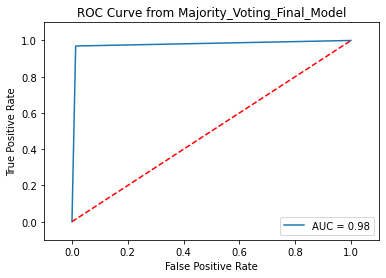

In [27]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve from Majority_Voting_Final_Model')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/Majority_Voting_Final_Model_roc_balanced.jpg')
plt.show()

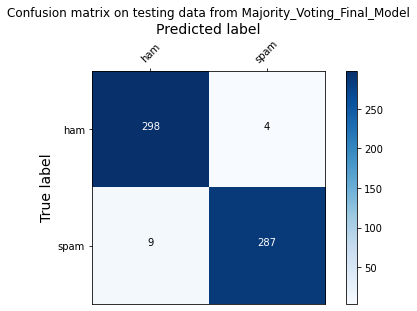

In [28]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.title("Confusion matrix on testing data from Majority_Voting_Final_Model")
plt.savefig('results/Majority_Voting_Final_Model_confusion_matrix_balanced.jpg')
plt.show()
